No configuration for shape_dilation found, parameter will be set to 0
No configuration for shape_erosion found, parameter will be set to 0
No configuration for binary_smoothing found, parameter will be set to 3
No configuration for convolution_smoothing found, parameter will be set to 15
No configuration for rdp_epsilon found, parameter will be set to 0.1
No configuration for path_optimization found, parameter will be set to hilbert
No configuration for greedy_k found, parameter will be set to 0
No configuration for hilbert_p found, parameter will be set to 7
No configuration for xml_decimal_transform found, parameter will be set to 100
No configuration for distance_heuristic found, parameter will be set to 300
No configuration for join_intersecting found, parameter will be set to True
No configuration for threads found, parameter will be set to 10
Path optimizer used for XML generation: hilbert
cell set 0 passed sanity check
Calculating coordinate locations of all cells.
Processing ce

/Users/sophia/Documents/GitHub/py-lmd/src/lmd/lib.py:884: UserWarning: Class 0 is not a valid class and was removed from the cell set
  warnings.warn(


dilating shapes:   0%|          | 0/208 [00:00<?, ?it/s]

0 shapes that were intersecting were found and merged.


creating shapes:   0%|          | 0/208 [00:00<?, ?it/s]

calculating polygons:   0%|          | 0/208 [00:00<?, ?it/s]

Current path length: 98,744.36 units
Optimized path length: 14,439.21 units
Optimization factor: 6.8x


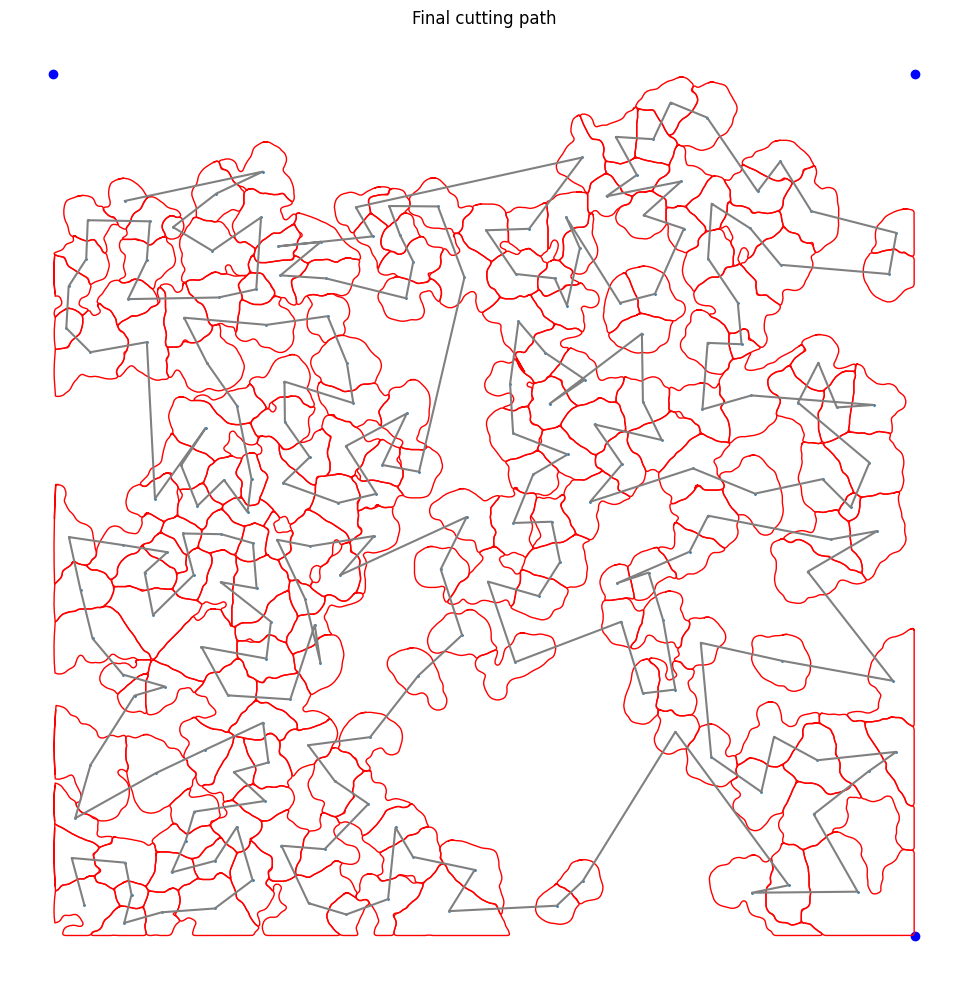

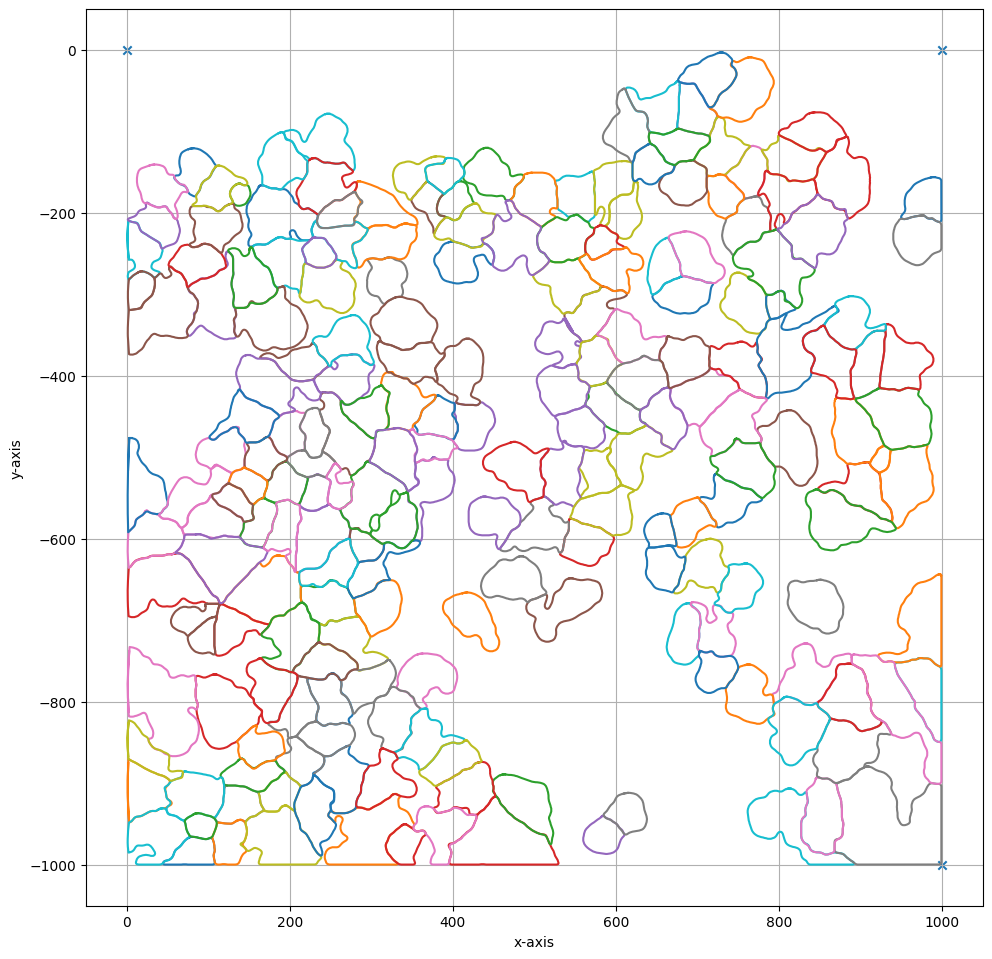

In [6]:
import numpy as np
from PIL import Image
from lmd.lib import SegmentationLoader

im = Image.open("segmentation_cytosol.tiff")
segmentation = np.array(im).astype(np.uint32)

all_classes = np.unique(segmentation)

cell_sets = [{"classes": all_classes, "well": "A1"}]

calibration_points = np.array([[0, 0], [0, 1000], [1000, 1000]])

loader_config = {"orientation_transform": np.array([[0, -1], [1, 0]])}

sl = SegmentationLoader(config=loader_config, verbose=True)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.plot(fig_size=(10, 10))

No configuration for shape_erosion found, parameter will be set to 0
No configuration for rdp_epsilon found, parameter will be set to 0.1
No configuration for greedy_k found, parameter will be set to 0
No configuration for hilbert_p found, parameter will be set to 7
No configuration for xml_decimal_transform found, parameter will be set to 100
No configuration for distance_heuristic found, parameter will be set to 300
No configuration for threads found, parameter will be set to 10
Path optimizer used for XML generation: hilbert
cell set 0 passed sanity check
Calculating coordinate locations of all cells.
Processing cell sets in serial
Convert label format into coordinate format
Conversion finished, performing sanity check.


/Users/sophia/Documents/GitHub/py-lmd/src/lmd/lib.py:884: UserWarning: Class 0 is not a valid class and was removed from the cell set
  warnings.warn(


creating shapes:   0%|          | 0/208 [00:00<?, ?it/s]

calculating polygons:   0%|          | 0/208 [00:00<?, ?it/s]

Current path length: 98,744.20 units
Optimized path length: 14,490.71 units
Optimization factor: 6.8x


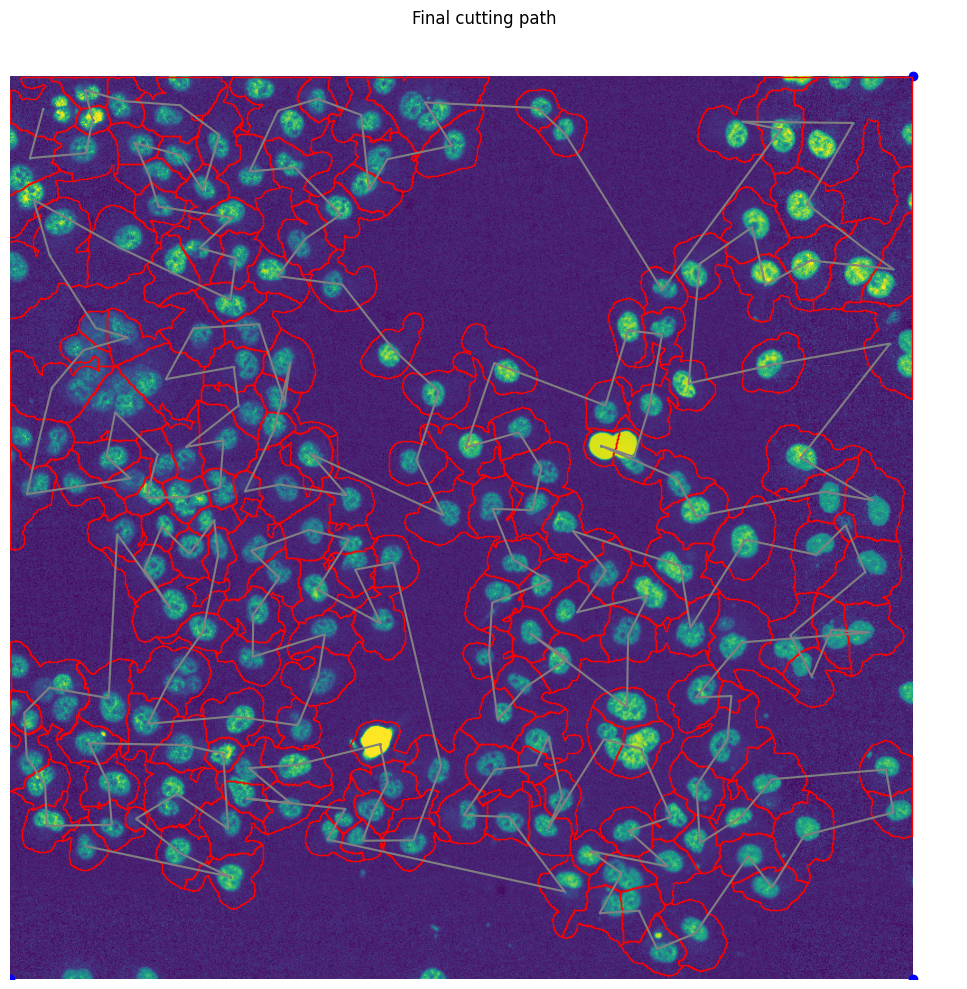

===== Collection Stats =====
Number of shapes: 208
Number of vertices: 37,415
Mean vertices: 180
Min vertices: 67
5% percentile vertices: 101
Median vertices: 174
95% percentile vertices: 266
Max vertices: 343


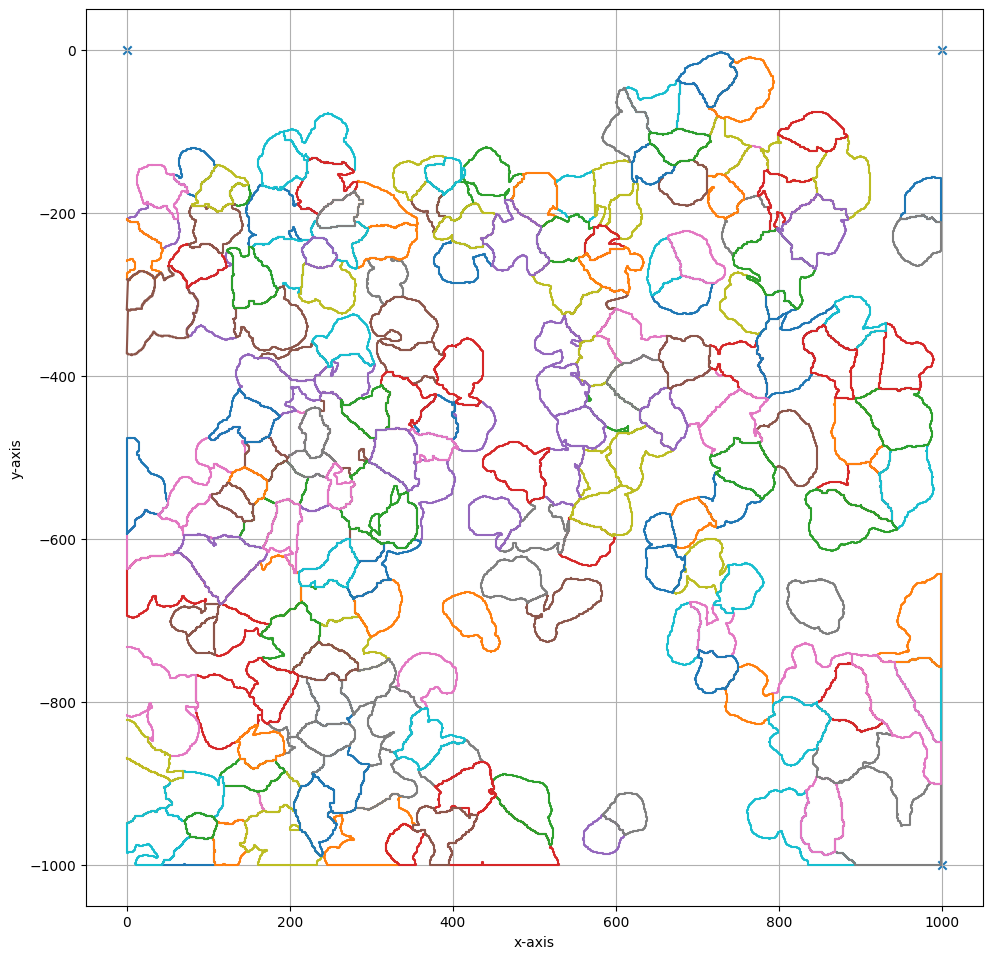

In [ ]:
import numpy as np
from PIL import Image
from lmd.lib import Collection, Shape, SegmentationLoader

im = Image.open("segmentation_cytosol.tiff")
segmentation = np.array(im)

im = np.load("channels.npy")
dapi = im[0]

all_classes = np.unique(segmentation)

rng = np.random.default_rng(0)
indices = np.unique(rng.integers(1, len(all_classes), size=100))
classes_to_cut = all_classes  # np.array_split(all_classes[indices],2)

cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0, 0], [0, 1000], [1000, 1000]])

loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "shape_dilation": 0,
    "binary_smoothing": 0,
    "poly_compression_factor": 1,
    "path_optimization": "hilbert",
    "convolution_smoothing": 1,
    "join_intersecting": False,
    "background_image": dapi,
}

sl = SegmentationLoader(config=loader_config, verbose=True)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.stats()
shape_collection.plot(calibration=True, fig_size=(10, 10))

Processing cell sets in serial
===== Collection Stats =====
Number of shapes: 7
Number of vertices: 1,535
Mean vertices: 219
Min vertices: 173
5% percentile vertices: 176
Median vertices: 215
95% percentile vertices: 263
Max vertices: 269


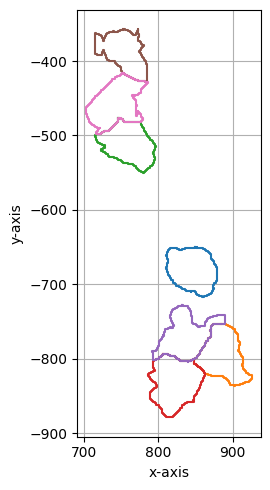

Processing cell sets in serial
===== Collection Stats =====
Number of shapes: 7
Number of vertices: 533
Mean vertices: 76
Min vertices: 61
5% percentile vertices: 64
Median vertices: 73
95% percentile vertices: 95
Max vertices: 100


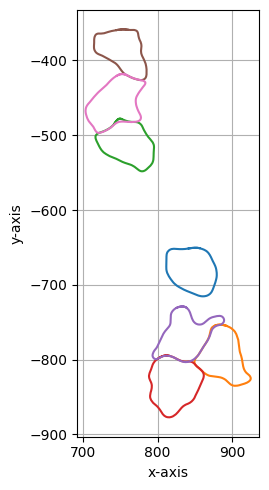

In [ ]:
import numpy as np
from PIL import Image
from lmd.lib import SegmentationLoader


im = Image.open("segmentation_cytosol.tiff")
segmentation = np.array(im)

im = np.load("channels.npy")
dapi = im[0]

all_classes = np.unique(segmentation)
rng = np.random.default_rng(0)
indices = np.unique(rng.integers(1, len(all_classes), size=100))

classes_to_cut = [13, 15, 23, 24, 25, 32, 36]


cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0, 0], [0, 1000], [1000, 1000]])

loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "shape_dilation": 0,
    "binary_smoothing": 0,
    "rdp": 0.7,
    "path_optimization": "none",
    "convolution_smoothing": 1,
    "join_intersecting": False,
}

sl = SegmentationLoader(config=loader_config, verbose=False)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.stats()
shape_collection.plot(calibration=False, fig_size=(5, 5))


loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "shape_dilation": 0,
    "binary_smoothing": 10,
    "poly_compression_factor": 20,
    "path_optimization": "none",
    "convolution_smoothing": 40,
    "join_intersecting": False,
}

sl = SegmentationLoader(config=loader_config, verbose=False)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.stats()
shape_collection.plot(calibration=False, fig_size=(5, 5))

Processing cell sets in serial
===== Collection Stats =====
Number of shapes: 7
Number of vertices: 1,535
Mean vertices: 219
Min vertices: 173
5% percentile vertices: 176
Median vertices: 215
95% percentile vertices: 263
Max vertices: 269


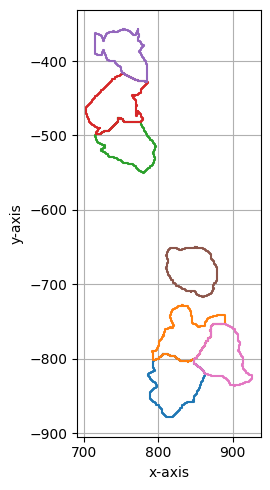

Processing cell sets in serial
===== Collection Stats =====
Number of shapes: 7
Number of vertices: 602
Mean vertices: 86
Min vertices: 64
5% percentile vertices: 67
Median vertices: 83
95% percentile vertices: 109
Max vertices: 112


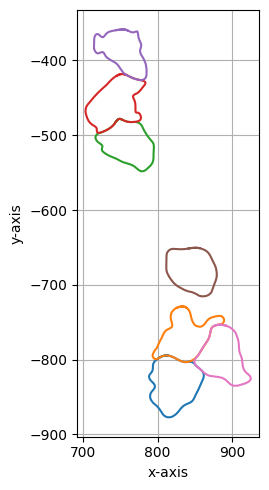

Processing cell sets in serial
===== Collection Stats =====
Number of shapes: 7
Number of vertices: 504
Mean vertices: 72
Min vertices: 59
5% percentile vertices: 60
Median vertices: 68
95% percentile vertices: 89
Max vertices: 91


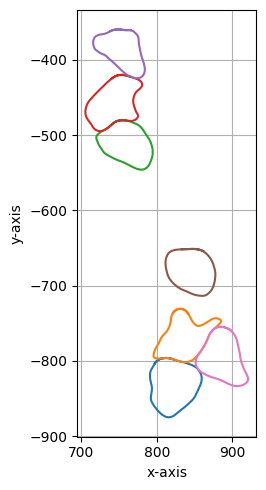

In [ ]:
import numpy as np
from PIL import Image
from lmd.lib import SegmentationLoader

im = Image.open("segmentation_cytosol.tiff")
segmentation = np.array(im)

im = np.load("channels.npy")
dapi = im[0]

all_classes = np.unique(segmentation)
rng = np.random.default_rng(0)
indices = np.unique(rng.integers(1, len(all_classes), size=100))
classes_to_cut = [13, 15, 23, 24, 25, 32, 36]


cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0, 0], [0, 1000], [1000, 1000]])

loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "shape_dilation": 0,
    "binary_smoothing": 0,
    "rdp": 0.7,
    "path_optimization": "hilbert",
    "convolution_smoothing": 1,
    "join_intersecting": False,
    "background_image": dapi,
}

sl = SegmentationLoader(config=loader_config, verbose=False)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.stats()
shape_collection.plot(calibration=False, fig_size=(5, 5), save_name="../../images/conv1.png")

loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "shape_dilation": 0,
    "binary_smoothing": 0,
    "rdp": 0.7,
    "path_optimization": "hilbert",
    "convolution_smoothing": 40,
    "join_intersecting": False,
    "background_image": dapi,
}

sl = SegmentationLoader(config=loader_config, verbose=False)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.stats()
shape_collection.plot(calibration=False, fig_size=(5, 5), save_name="../../images/conv40.png")

loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "shape_dilation": 0,
    "binary_smoothing": 0,
    "poly_compression_factor": 1,
    "path_optimization": "hilbert",
    "convolution_smoothing": 80,
    "join_intersecting": False,
    "background_image": dapi,
}

sl = SegmentationLoader(config=loader_config, verbose=False)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.stats()
shape_collection.plot(calibration=False, fig_size=(5, 5), save_name="../../images/conv80.png")

Processing cell sets in serial


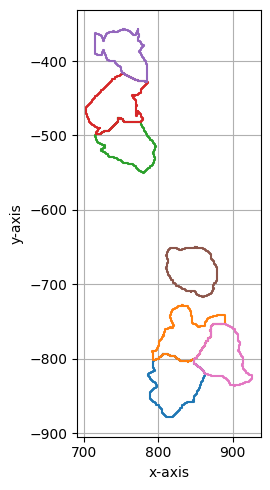

Processing cell sets in serial


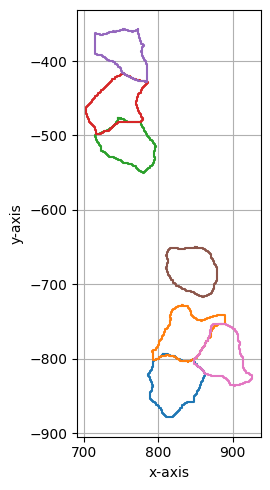

Processing cell sets in serial


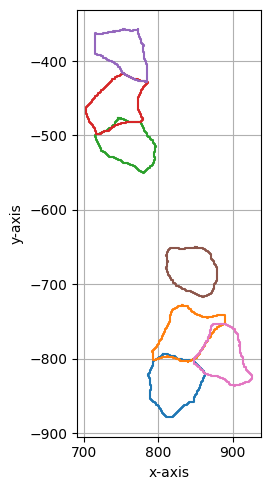

In [ ]:
import numpy as np
from PIL import Image
from lmd.lib import SegmentationLoader


im = Image.open("segmentation_cytosol.tiff")
segmentation = np.array(im)

im = np.load("channels.npy")
dapi = im[0]

all_classes = np.unique(segmentation)
rng = np.random.default_rng(0)
indices = np.unique(rng.integers(1, len(all_classes), size=100))
classes_to_cut = [13, 15, 23, 24, 25, 32, 36]


cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0, 0], [0, 1000], [1000, 1000]])

loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "shape_dilation": 0,
    "binary_smoothing": 0,
    "rdp": 0.7,
    "path_optimization": "hilbert",
    "convolution_smoothing": 1,
    "join_intersecting": False,
    "background_image": dapi,
}

sl = SegmentationLoader(config=loader_config, verbose=False)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.plot(calibration=False, fig_size=(5, 5), save_name="../../images/bin0.png")

loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "shape_dilation": 0,
    "binary_smoothing": 15,
    "poly_compression_factor": 1,
    "path_optimization": "hilbert",
    "convolution_smoothing": 1,
    "join_intersecting": False,
    "background_image": dapi,
}

sl = SegmentationLoader(config=loader_config, verbose=False)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.plot(calibration=False, fig_size=(5, 5), save_name="../../images/bin15.png")

loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "shape_dilation": 0,
    "binary_smoothing": 30,
    "rdp": 0.7,
    "path_optimization": "hilbert",
    "convolution_smoothing": 1,
    "join_intersecting": False,
    "background_image": dapi,
}

sl = SegmentationLoader(config=loader_config, verbose=False)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.plot(calibration=False, fig_size=(5, 5), save_name="../../images/bin30.png")

Processing cell sets in serial
===== Collection Stats =====
Number of shapes: 7
Number of vertices: 619
Mean vertices: 88
Min vertices: 66
5% percentile vertices: 70
Median vertices: 89
95% percentile vertices: 108
Max vertices: 114


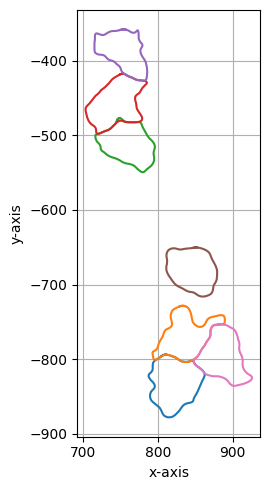

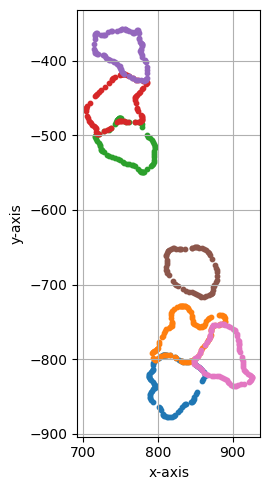

Processing cell sets in serial
===== Collection Stats =====
Number of shapes: 7
Number of vertices: 619
Mean vertices: 88
Min vertices: 66
5% percentile vertices: 70
Median vertices: 89
95% percentile vertices: 108
Max vertices: 114


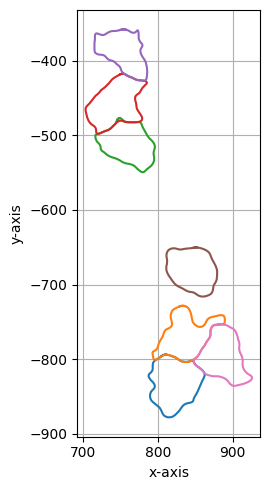

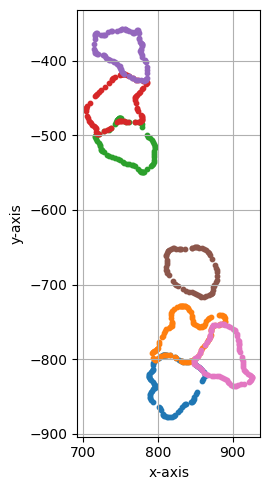

Processing cell sets in serial
===== Collection Stats =====
Number of shapes: 7
Number of vertices: 619
Mean vertices: 88
Min vertices: 66
5% percentile vertices: 70
Median vertices: 89
95% percentile vertices: 108
Max vertices: 114


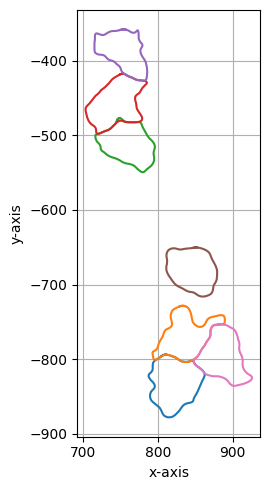

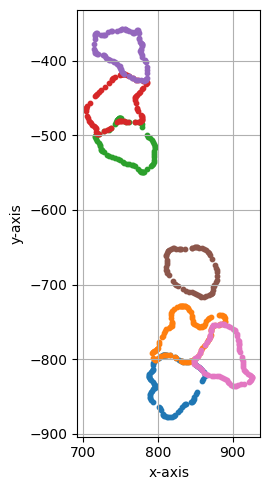

In [ ]:
import numpy as np
from PIL import Image
from lmd.lib import SegmentationLoader

im = Image.open("segmentation_cytosol.tiff")
segmentation = np.array(im)

im = np.load("channels.npy")
dapi = im[0]

all_classes = np.unique(segmentation)
rng = np.random.default_rng(0)
indices = np.unique(rng.integers(1, len(all_classes), size=100))
classes_to_cut = [13, 15, 23, 24, 25, 32, 36]


cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0, 0], [0, 1000], [1000, 1000]])

loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "shape_dilation": 0,
    "binary_smoothing": 5,
    "rdp": 0.7,
    "path_optimization": "hilbert",
    "convolution_smoothing": 20,
    "join_intersecting": False,
    "background_image": dapi,
}

sl = SegmentationLoader(config=loader_config, verbose=False)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.stats()
shape_collection.plot(calibration=False, fig_size=(5, 5))
shape_collection.plot(calibration=False, fig_size=(5, 5), mode="dots")

loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "shape_dilation": 0,
    "binary_smoothing": 5,
    "rdp": 0.7,
    "path_optimization": "hilbert",
    "convolution_smoothing": 20,
    "join_intersecting": False,
    "background_image": dapi,
}

sl = SegmentationLoader(config=loader_config, verbose=False)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.stats()
shape_collection.plot(calibration=False, fig_size=(5, 5))
shape_collection.plot(calibration=False, fig_size=(5, 5), mode="dots")

loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "shape_dilation": 0,
    "binary_smoothing": 5,
    "rdp": 0.7,
    "path_optimization": "hilbert",
    "convolution_smoothing": 20,
    "join_intersecting": False,
    "background_image": dapi,
}

sl = SegmentationLoader(config=loader_config, verbose=False)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.stats()
shape_collection.plot(calibration=False, fig_size=(5, 5))
shape_collection.plot(calibration=False, fig_size=(5, 5), mode="dots")

Processing cell sets in serial
===== Collection Stats =====
Number of shapes: 7
Number of vertices: 2,324
Mean vertices: 332
Min vertices: 280
5% percentile vertices: 287
Median vertices: 318
95% percentile vertices: 386
Max vertices: 390


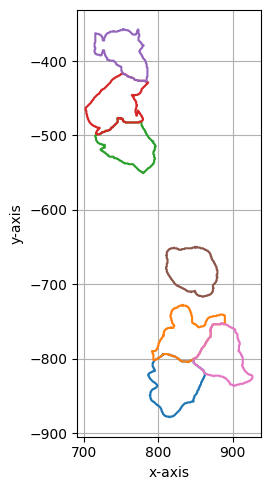

Processing cell sets in serial
===== Collection Stats =====
Number of shapes: 7
Number of vertices: 2,714
Mean vertices: 388
Min vertices: 336
5% percentile vertices: 343
Median vertices: 385
95% percentile vertices: 442
Max vertices: 456


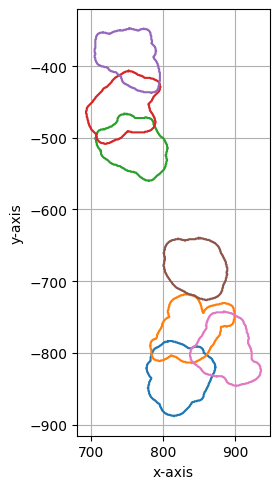

Processing cell sets in serial
Intersecting Shapes will be merged into a single shape.


dilating shapes:   0%|          | 0/7 [00:00<?, ?it/s]

0 shapes that were intersecting were found and merged.
===== Collection Stats =====
Number of shapes: 3
Number of vertices: 1,793
Mean vertices: 598
Min vertices: 359
5% percentile vertices: 392
Median vertices: 691
95% percentile vertices: 738
Max vertices: 743


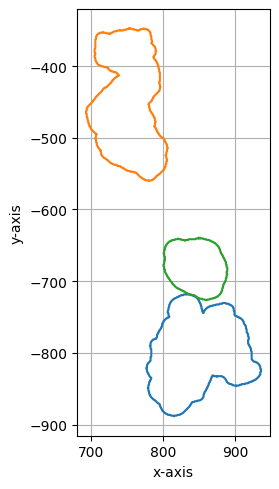

In [ ]:
import numpy as np
from PIL import Image
from lmd.lib import SegmentationLoader

im = Image.open("segmentation_cytosol.tiff")
segmentation = np.array(im)

im = np.load("channels.npy")
dapi = im[0]

all_classes = np.unique(segmentation)
rng = np.random.default_rng(0)
indices = np.unique(rng.integers(1, len(all_classes), size=100))
classes_to_cut = [13, 15, 23, 24, 25, 32, 36]


cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0, 0], [0, 1000], [1000, 1000]])

loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "shape_dilation": 0,
    "binary_smoothing": 0,
    "rdp": 0,
    "path_optimization": "hilbert",
    "convolution_smoothing": 3,
    "join_intersecting": False,
    "background_image": dapi,
}

sl = SegmentationLoader(config=loader_config, verbose=False)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.stats()
shape_collection.plot(calibration=False, fig_size=(5, 5))

loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "shape_dilation": 10,
    "binary_smoothing": 0,
    "rdp": 0,
    "path_optimization": "hilbert",
    "convolution_smoothing": 3,
    "join_intersecting": False,
    "background_image": dapi,
}

sl = SegmentationLoader(config=loader_config, verbose=False)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.stats()
shape_collection.plot(calibration=False, fig_size=(5, 5))

loader_config = {
    "orientation_transform": np.array([[0, -1], [1, 0]]),
    "shape_dilation": 10,
    "binary_smoothing": 0,
    "rdp": 0,
    "path_optimization": "hilbert",
    "convolution_smoothing": 3,
    "join_intersecting": True,
    "background_image": dapi,
}

sl = SegmentationLoader(config=loader_config, verbose=False)
shape_collection = sl(segmentation, cell_sets, calibration_points)

shape_collection.stats()
shape_collection.plot(calibration=False, fig_size=(5, 5))